<a href="https://colab.research.google.com/github/yuvalira/Final-Project-Adversarial-Attack-on-Tabular-Classification/blob/main/EDA/Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn.preprocessing import LabelEncoder
import seaborn as sn
import matplotlib.pyplot as plt

# **Adult Income - Dataset Analysis**
An individual's annual income is influenced by various factors, including education level, age, gender, occupation, and other socio-economic attributes. The Adult Income dataset captures these relationships through demographic and employment-related variables, making it a valuable resource for analyzing income distribution patterns and building predictive models.

In this section, we analyze the Adult Income dataset to understand its structure, examine relationships between variables, and identify key patterns that may influence an individual's income.



### 1. Data Loading & Initial Overview
The first step involves obtaining the dataset from Kaggle and loading it into a suitable analysis environment (e.g., Pandas in Python).

In [2]:
# Download dataset
path = kagglehub.dataset_download("wenruliu/adult-income-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/adult-income-dataset


In [3]:
# Find the actual CSV file in the directory
csv_file = None
for file in os.listdir(path):
    if file.endswith(".csv"):
        csv_file = os.path.join(path, file)
        break

if csv_file:
    # Load the CSV file
    df = pd.read_csv(csv_file)
    print("Dataset loaded successfully!")
else:
    print("No CSV file found in the downloaded dataset path.")

Dataset loaded successfully!


Data view

In [4]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### 2. Exploratory Data Analysis (EDA)
Exploratory Data Analysis (EDA) is the process of examining a dataset to understand its structure, identify patterns, and detect anomalies before applying machine learning models.

First, we will compute summery statistics.
The `.describe()` function provides important **summary statistics** for numerical features, including:
- **Mean** (Average value)
- **Standard Deviation** (Spread of the data)
- **Min & Max** (Range of values)
- **Percentiles** (25%, 50%, 75% quartiles)

Let's check the summary:

In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Now, we will visualize numeric features distributions using histograms.
Histograms help us understand the spread and shape of numerical variables.They show whether a feature is normally distributed, skewed, or contains outliers.  

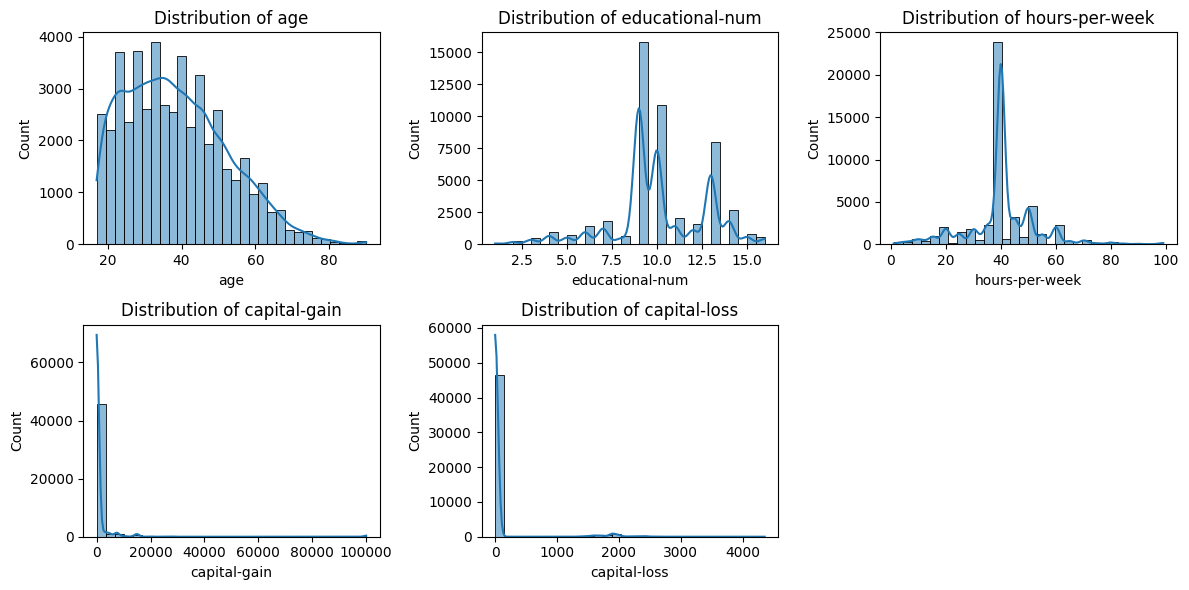

In [6]:
# List of numerical features
numerical_features = ['age', 'educational-num', 'hours-per-week', 'capital-gain','capital-loss' ]

# Plot all histograms
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sn.histplot(df[feature], bins=30, kde=True)
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

To understand the impact of education, occupation, gender, and other categories, we can group them and compare income levels.

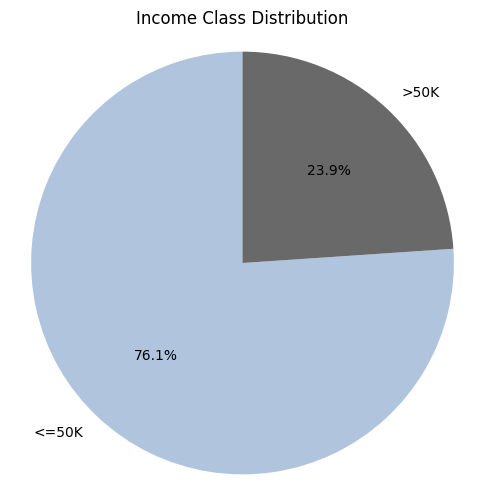

In [7]:
# Define colors
colors = ["lightsteelblue", "dimgrey"]

# compute income counts
income_counts = df['income'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(income_counts.values,
        labels=income_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors)
plt.title("Income Class Distribution")
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()

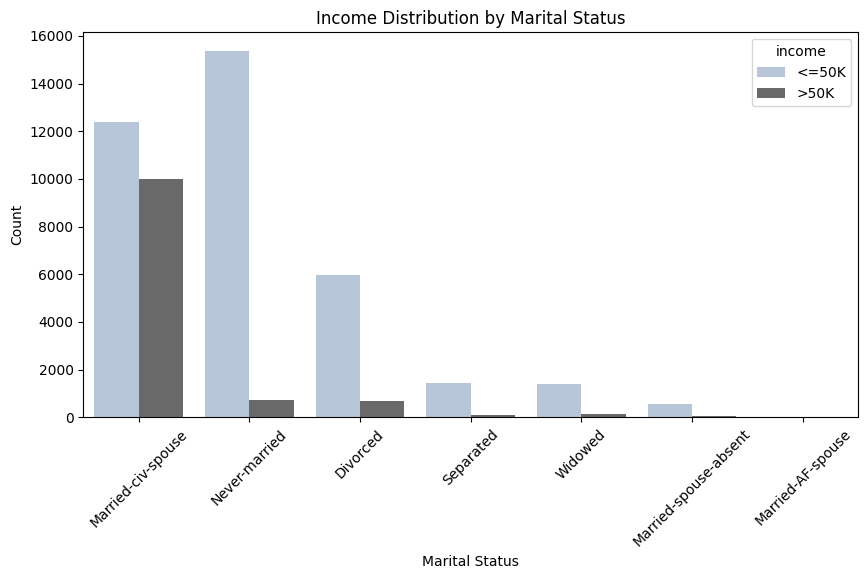

In [8]:
# Income Distribution by Marital Status
plt.figure(figsize=(10, 5))
sn.countplot(x="marital-status", hue="income", data=df, order=df["marital-status"].value_counts().index, palette=colors)
plt.xticks(rotation=45)
plt.title("Income Distribution by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()

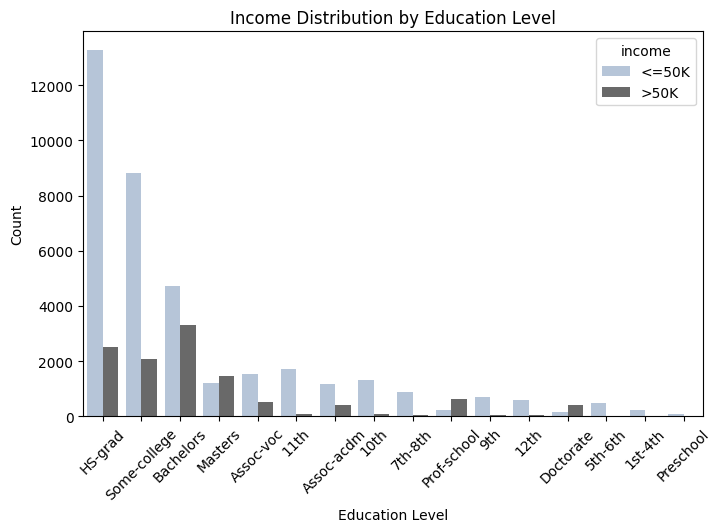

In [9]:
# Income Distribution by Education Level
plt.figure(figsize=(8, 5))
sn.countplot(x="education", hue="income", data=df, order=df["education"].value_counts().index, palette=colors)
plt.xticks(rotation=45)
plt.title("Income Distribution by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()

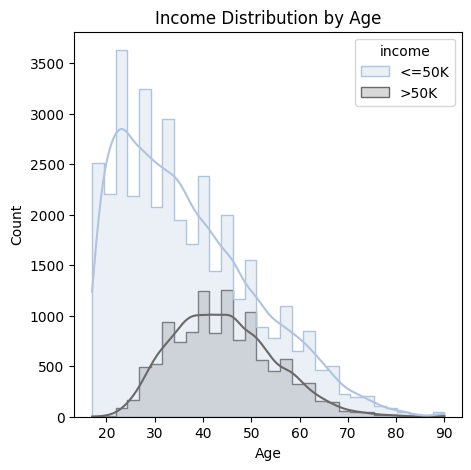

In [10]:
# Income Distribution by Age (Histogram)
plt.figure(figsize=(5, 5))
sn.histplot(df, x="age", hue="income", bins=30, kde=True, element="step", palette=colors)
plt.title("Income Distribution by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

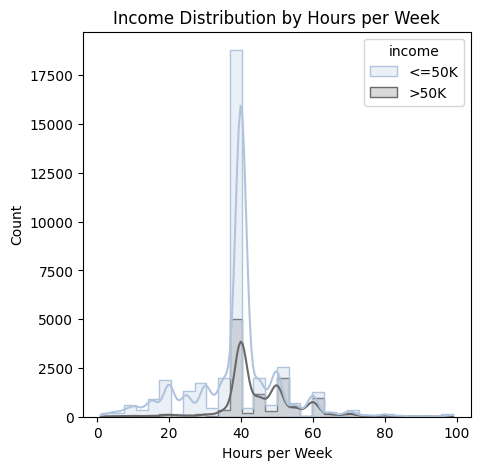

In [11]:
# Income Distribution by Hours per Week (Histogram)
plt.figure(figsize=(5, 5))
sn.histplot(df, x="hours-per-week", hue="income", bins=30, kde=True, element="step", palette=colors)
plt.title("Income Distribution by Hours per Week")
plt.xlabel("Hours per Week")
plt.ylabel("Count")
plt.show()

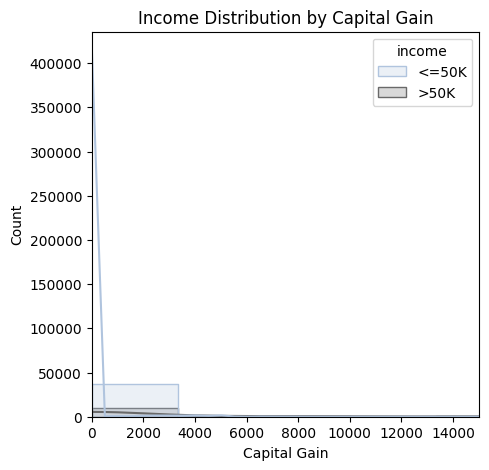

In [12]:
# Income Distribution by Capital Gain(Histogram)
plt.figure(figsize=(5, 5))
sn.histplot(df, x="capital-gain", hue="income", bins=30, kde=True, element="step", palette=colors)
plt.title("Income Distribution by Capital Gain")
plt.xlabel("Capital Gain")
plt.ylabel("Count")
plt.xlim(0, df["capital-gain"].quantile(0.99))  # Remove extreme outliers
plt.show()

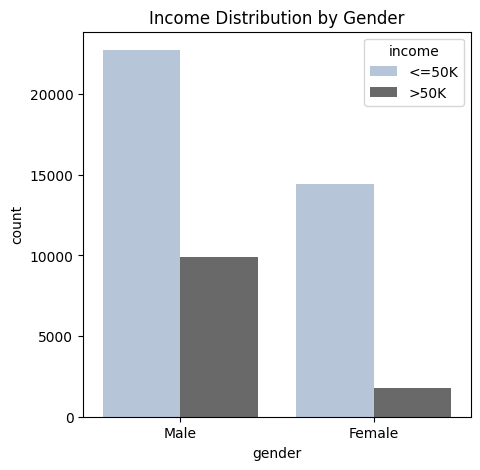

In [13]:
# Income Distribution by Gender
plt.figure(figsize=(5, 5))
sn.countplot(x="gender", hue="income", data=df, palette=colors)
plt.title("Income Distribution by Gender")
plt.show()

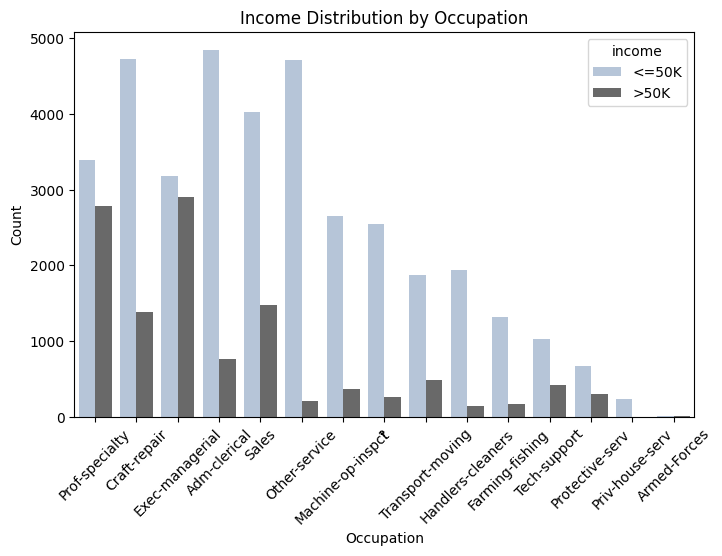

In [14]:
# Income Distribution by Occupation
plt.figure(figsize=(8, 5))
sn.countplot(x="occupation", hue="income", data=df, order=df["occupation"].value_counts().index, palette=colors)
plt.xticks(rotation=45)
plt.title("Income Distribution by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.show()

### 3. Correlation Analysis
To better understand how variables relate to income, we compute a correlation matrix.  
- Values close to +1 indicate a strong positive correlation.
- Values close to -1 indicate a strong negative correlation.
- Values near 0 suggest no strong relationship.



Since machine learning models work with numerical data, we need to convert categorical variables into numeric values. We use one-hot encoding (pd.get_dummies) for this purpose.

In [15]:

\
df_numeric = df.copy()

# Convert the income column into a binary numeric variable ('<=50K' -> 0, '>50K' -> 1)
if df_numeric['income'].dtype == 'object':
    le = LabelEncoder()
    df_numeric['income'] = le.fit_transform(df_numeric['income'])

# Convert other categorical features to numeric
categorical_columns = df_numeric.select_dtypes(include=['object']).columns
df_numeric = pd.get_dummies(df_numeric, columns=categorical_columns, drop_first=True)

df_numeric

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,0,0,50,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,0,0,40,1,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,7688,0,40,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,10,0,0,30,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,154374,9,0,0,40,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,151910,9,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48840,22,201490,9,0,0,20,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


Top 10 features most correlated with 'income':
marital-status_Married-civ-spouse    0.445853
educational-num                      0.332613
age                                  0.230369
hours-per-week                       0.227687
capital-gain                         0.223013
gender_Male                          0.214628
occupation_Exec-managerial           0.210938
occupation_Prof-specialty            0.188793
education_Bachelors                  0.180371
education_Masters                    0.174184
Name: income, dtype: float64


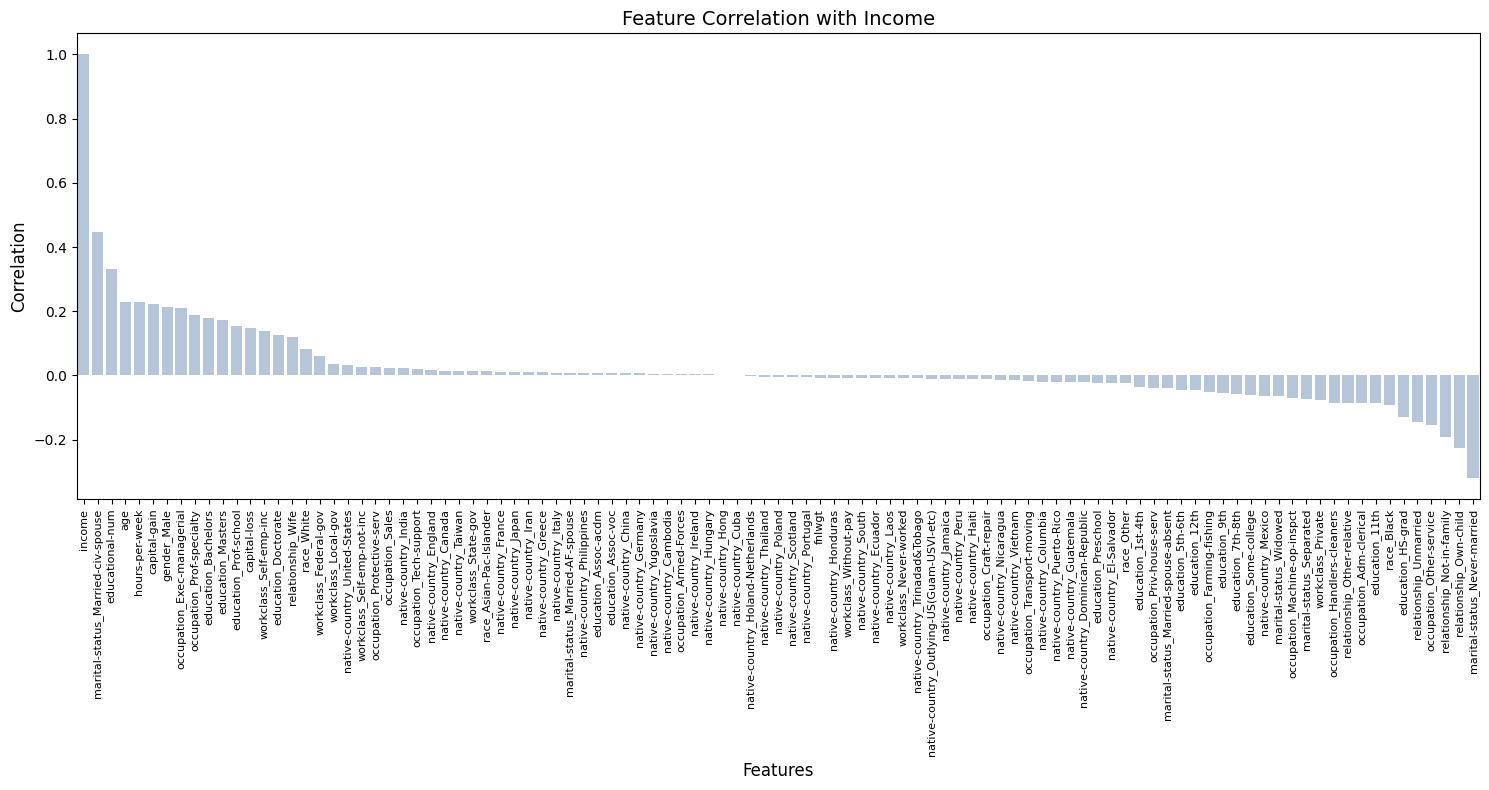

In [16]:
# Calculate the correlation
correlation_matrix = df_numeric.corr()['income'].sort_values(ascending=False)

# Display the top 10 correlation values
print("Top 10 features most correlated with 'income':")
print(correlation_matrix[1:11])

# Extract the feature names and their correlations
features = correlation_matrix.index
correlations = correlation_matrix.values

# Plot
plt.figure(figsize=(15, 8))
sn.barplot(x=features, y=correlations, color="lightsteelblue")

# Adjust x-axis for readability
plt.xticks(rotation=90, fontsize=8)
plt.title('Feature Correlation with Income', fontsize=14)
plt.ylabel('Correlation', fontsize=12)
plt.xlabel('Features', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

Now, we use a heatmap to visualize the relationships of the top 10 features most correlated with 'income'

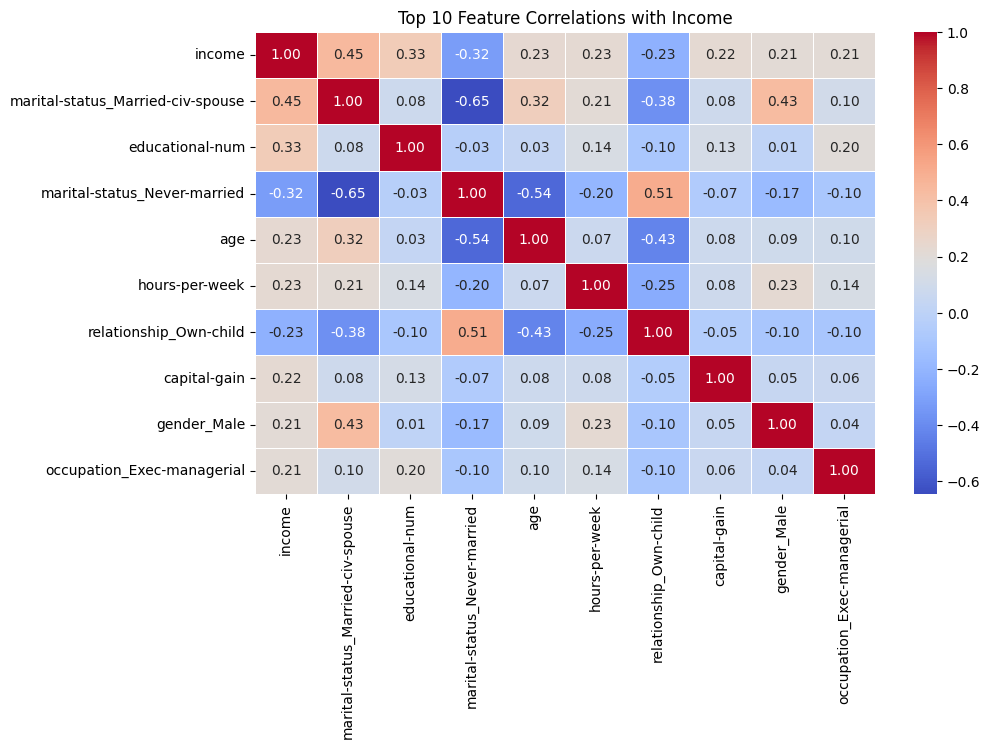

In [17]:
# Compute the full correlation matrix
correlation_matrix2 = df_numeric.corr()

# Ensure 'income' exists in correlation_matrix
if "income" in correlation_matrix2.columns:
    # Select the top 10 most correlated features with income
    top_features = correlation_matrix2["income"].abs().sort_values(ascending=False).index[:10]

    # Create a heatmap with only those features
    plt.figure(figsize=(10, 6))  # Adjust figure size
    sn.heatmap(df_numeric[top_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

    plt.title("Top 10 Feature Correlations with Income")
    plt.show()
else:
    print("Error: 'income' column is not in correlation_matrix. Check if df_numeric.corr() was computed correctly.")
